# <center> Практические задания по цифровой обработке сигналов </center>
# <center> Первая лабораторная работа </center>


В данной работе Вы познакомитесь с основными методами работы с аудиоданными в Python. Разбересь в том, как работает свертка, и примените пару интересных фильтров.

# Задание 1. Работа с аудиофайлами в Python (1 балл)

## Теория

Звук - это аналоговый сигнал. То есть он является непрерывным по времени и по значениям. Для того, чтобы работать со звуком на цифровом устройстве, надо преобразовать его в цифровое представление. Для этого надо разделить непрерывный сигнал на промежутки времени (дискретизация сигнала) и разбить непрерывные значения на интервалы (квантование сигнала). Выбраные параметры дискретизации и квантования сигнала напрямую влияют на качество цифрового сигнала. 

<!-- 
## Практика

1. Что хранится в .wav файле? Как узнать параметры дискретизации и квантования .wav файла? 

2. Запишите аудиофайл со своим голосом. Загрузите его. Попробуйте поменять ему частоту дискретизации. Нарисуйте форму волны считанного файла. Воспроизведите полученные сигналы. При какой частоте дискретизации становится невозможно разобрать человеческую речь?   

3. Чем .wav отличается от других кодеков, например .mp3 или .ogg? -->


<!-- ### Подсказка

Записать цифровой сигнал можно при помощи, например, [Audacity](https://www.audacityteam.org) или [Adobe Audition](https://www.adobe.com/ru/products/audition.html). Для считывания файлов воспользуйтесь библиотекой [scipy](https://www.scipy.org) или [librosa](https://librosa.org/doc/latest/index.html). Для воспроизведения аудиофайла удобно использовать класс Audio из модуля IPython.display, а для отрисовки - matplotlib. -->

In [5]:
import matplotlib.pyplot as plt 
import numpy as np
%matplotlib inline

### 1. Что хранится в .wav файле? Как узнать параметры дискретизации и квантования .wav файла?

.wav файл представляет собой файл-контейнер, который представляется в виде последовательности блоков данных. Файл wave содержит один главный блок в котором должны быть два основных подблока: **fmt** и **data**.    

В блоке **fmt** (блок формата) хранятся данные: 
- ID секции
- Размер ее данных
- Код типа сжатия данных
- Кол-во каналов
- Частота дискретизации
- Количество байт в секунду
- Количество используемых бит на сэмпл (квантование)
- Некоторые другие атрибуты

В блоке **data** содержит данные цифровых сэмплов, которые можно декодировать, используя данные блока **fmt**.    
Параметры дискретизации узнаются из значений в соответсвующих полях файла .wav. Можно сделать это самому, написать программу для чтения данных из соответствующего блока, или воспользоваться готовыми реализациями. Частота дискретизации, например, возвращается при вызове функции *librosa.load(...)*, параметры квантования можно узнать через метод *getsampwidth()* библиотеки *wave* (возвращает в байтах) или через *wavefile* библиотеки *scipy.io*. 

### 2. Запишите аудиофайл со своим голосом. Загрузите его. Попробуйте поменять ему частоту дискретизации. Нарисуйте форму волны считанного файла. Воспроизведите полученные сигналы. При какой частоте дискретизации становится невозможно разобрать человеческую речь?

**Подсказка**

Записать цифровой сигнал можно при помощи, например, [Audacity](https://www.audacityteam.org) или [Adobe Audition](https://www.adobe.com/ru/products/audition.html). Для считывания файлов воспользуйтесь библиотекой [scipy](https://www.scipy.org) или [librosa](https://librosa.org/doc/latest/index.html). Для воспроизведения аудиофайла удобно использовать класс Audio из модуля IPython.display, а для отрисовки - matplotlib.

In [158]:
%matplotlib inline
import IPython.display as ipd
import librosa
import librosa.display
import matplotlib.pyplot as plt

In [102]:
ipd.Audio(filename='/home/gv/wave.wav') #Оригинальный файл с голосом

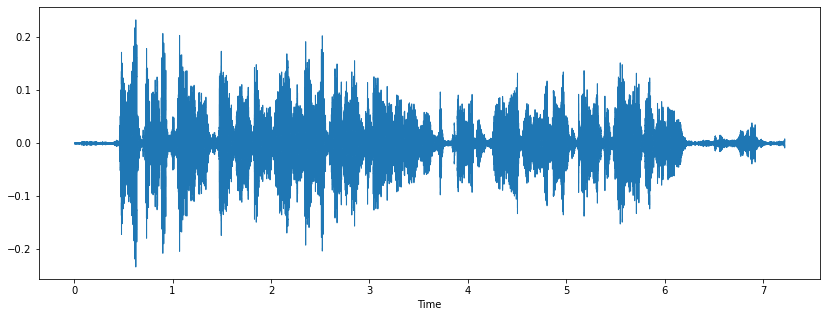

In [172]:
#Нарисуем форму волны
x, sr = librosa.load('/home/gv/wave.wav')
plt.figure(figsize=(14, 5))
librosa.display.waveshow(x, sr=sr)

In [173]:
#Поменяем чатоту дискретизации
x, sr = librosa.load('/home/gv/wave.wav', sr=3000)

In [174]:
ipd.Audio(x, rate=3000)

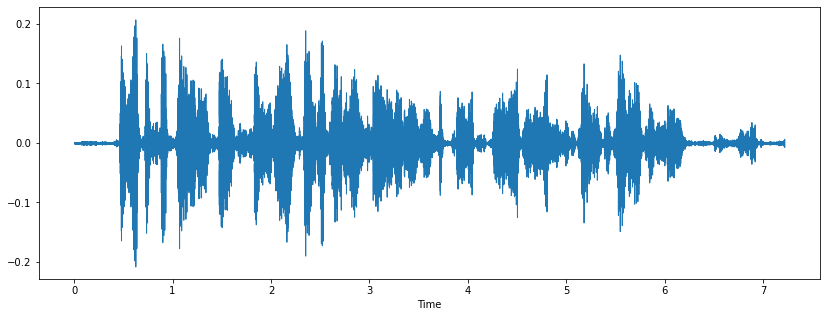

In [176]:
plt.figure(figsize=(14, 5))
librosa.display.waveshow(x, sr=sr)

При частоте дискретизации в 3000 Гц половина данной дорожки не различима.

In [162]:
# Эти манипуляции нужны для обхода того, что ipd.Audio не хочет воспроизводить звук с sr < 3000.
# Выставим sr=1000
import soundfile as sf
x, sr = librosa.load('/home/gv/wave.wav', sr=1000)
sf.write('w1.wav', x, 1000)
x1, sr = librosa.load('w1.wav', sr=3000)

In [163]:
ipd.Audio(x1, rate=3000)

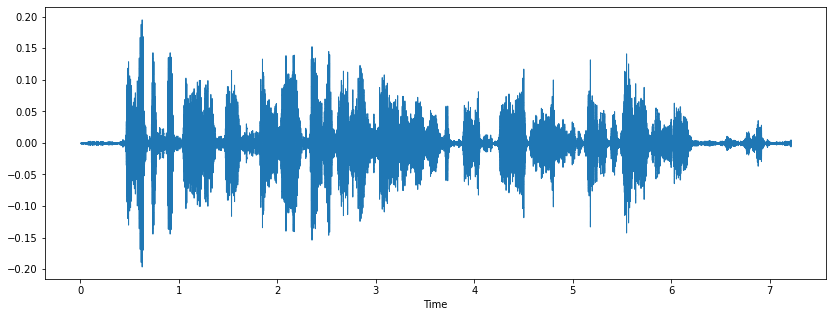

In [171]:
plt.figure(figsize=(14, 5))
librosa.display.waveshow(x1, sr=sr)

**При частоте дискретизации 1000 разобрать человеческую речь невозможно.**

### 3. Чем .wav отличается от других кодеков, например .mp3 или .ogg?

В .wav не используется сжатие данных в отличие mp3, ogg. Нет ограничений на частоту дискретизации (в mp3 -- есть). Ну и отличия в самой структуре файла.

# Задание 2. Гармонические сигналы (1 балл)

## Теория
[Гармонические колебания](https://ru.wikipedia.org/wiki/Гармонические_колебания) -  колебания, при которых физическая величина изменяется с течением времени по гармоническому (синусоидальному/косинусоидальному) закону. 

В общем случае гармонические колебания задаются формулой:

$$y=A \cos(\omega t+\varphi_0)$$

где $А$ - это амплитуда, $\omega$ – циклическая частота (радиан/с), $\varphi$ - фаза (сдвиг), $t$ – время. 


In [1]:
# Сначала определим функцию для отрисовки сигнала с хорошим масштабом и сеткой
# Это поможет легче анализировать сигнал
def draw_signal(data, figsize=(14, 14)):
    plt.figure(figsize=figsize)
    plt.plot(data, linewidth=2)
    plt.minorticks_on()
    plt.xticks(np.arange(0, 1000, step=100))
    plt.yticks(np.arange((data.min().round())//10*10, 
                         (data.max().round())//10*10+10, step=5))
    plt.grid(which='major',
        color = 'k', 
        linewidth = 1)
    plt.grid(which='minor', 
        color = 'k', 
        linestyle = ':')
    plt.show()

In [3]:
# Читаем данные с подготовленными сигналами
import pickle
with open("data.pickle", "rb") as f:
    test_data = pickle.load(f)
# Теперь можно приступать к практике!

## Практика

Постройте графики трех сигналов a, b и c из test_data['task2']. Попробуйте подобрать коэффициенты для этих сигналов. Сгенерируйте сигналы (1000 отсчетов) с подобранными коэффициентами. Постройте графики сгенерированных сигналов и пройдите тест на схожесть с оригинальным.


Подсказка. Фаза, период и амплитуда сигнала - целочисленные. Для генерации пользуйтесь библиотекой numpy и функциями arange, sin, cos.

### Сигнал ***a***

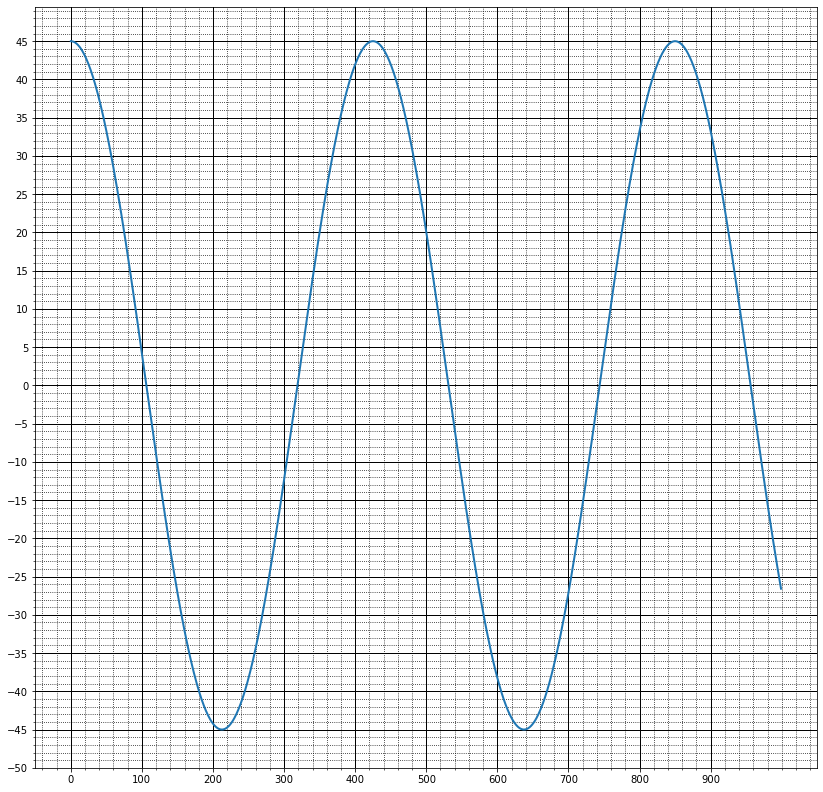

In [45]:
draw_signal(test_data['task2']['a'])

In [178]:
# YOUR CODE HERE
x_set = np.arange(0, 1000, step=1)
A = 45
w = 69957
a = A * np.cos(w * x_set)

In [181]:
w = 0
a = A * np.cos(w * x_set)
while not np.allclose(a, test_data["task2"]["a"], atol=1):
    w += 1
    a = A * np.cos(w * x_set)
print(w)

69957


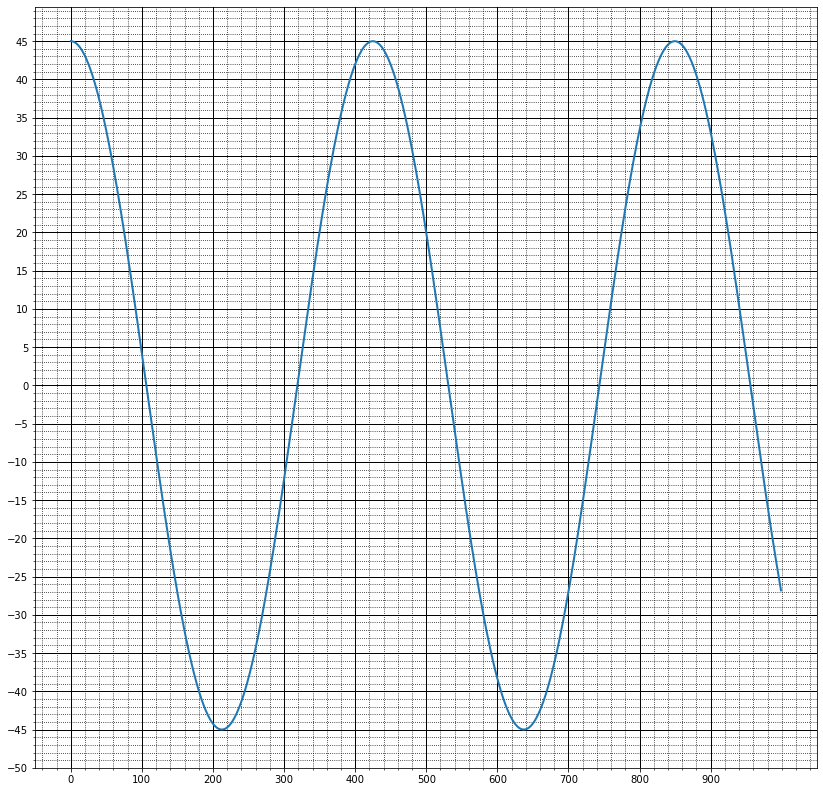

In [180]:
draw_signal(a)

In [109]:
assert len(a) == 1000
assert np.allclose(a, test_data["task2"]["a"], atol=1)
print("Ok!")

Ok!


**Подобранные коэффициенты для сигнала 'a':**

1. Амплитуда - $A= 45$

2. Угловая частота ($ \displaystyle\omega =\frac{2\pi}{T}) = 69957$

3. Фаза - $\phi= 0$

### Сигнал ***b***

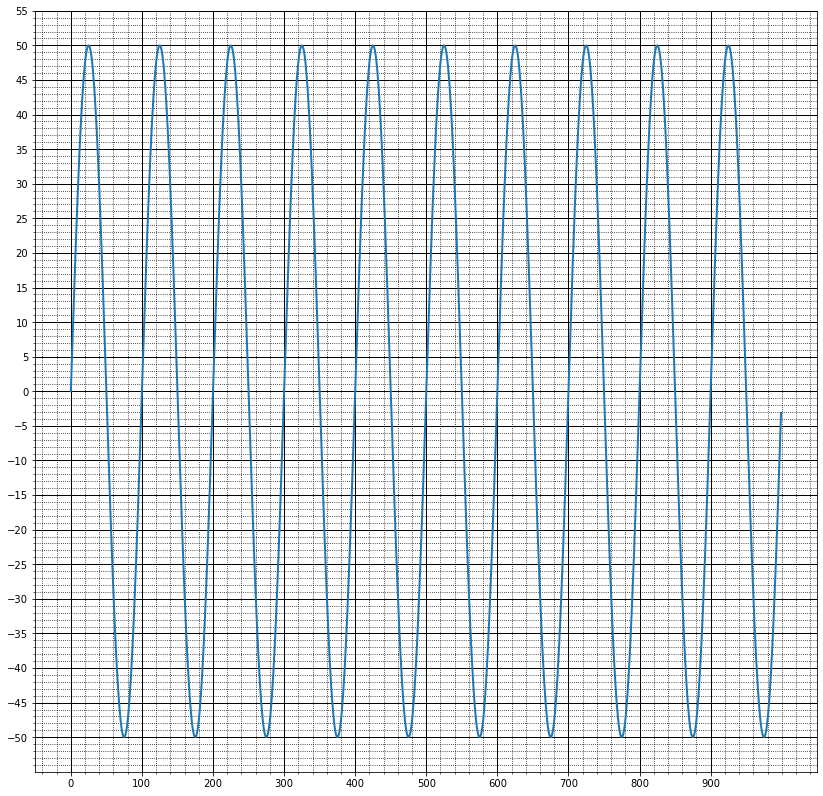

In [169]:
draw_signal(test_data['task2']['b'])

In [100]:
# YOUR CODE HERE
x_set = np.arange(0, 1000, step=1)
A = 50
w = 10449
b = A * np.sin(w * x_set)

In [99]:
while not np.allclose(b, test_data["task2"]["b"], atol=1):
    w += 1
    b = A * np.sin(w * x_set)
print(w)

10449


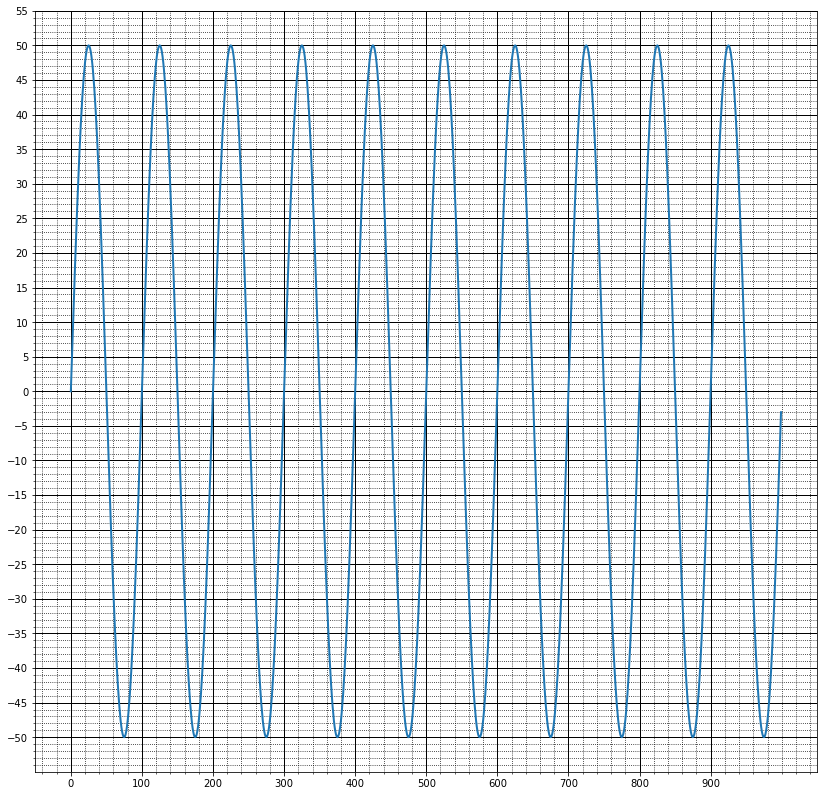

In [101]:
draw_signal(b)

In [102]:
assert len(b)== 1000
assert np.allclose(b, test_data["task2"]["b"], atol=1)
print("Ok!")

Ok!


**Подобранные коэффициенты для сигнала 'b':**

1. Амплитуда - $A= 50$

2. Угловая частота ($ \displaystyle\omega =\frac{2\pi}{T}) = 10449$

3. Фаза - $\phi= -\frac{\pi}{2}$

### Сигнал ***c***

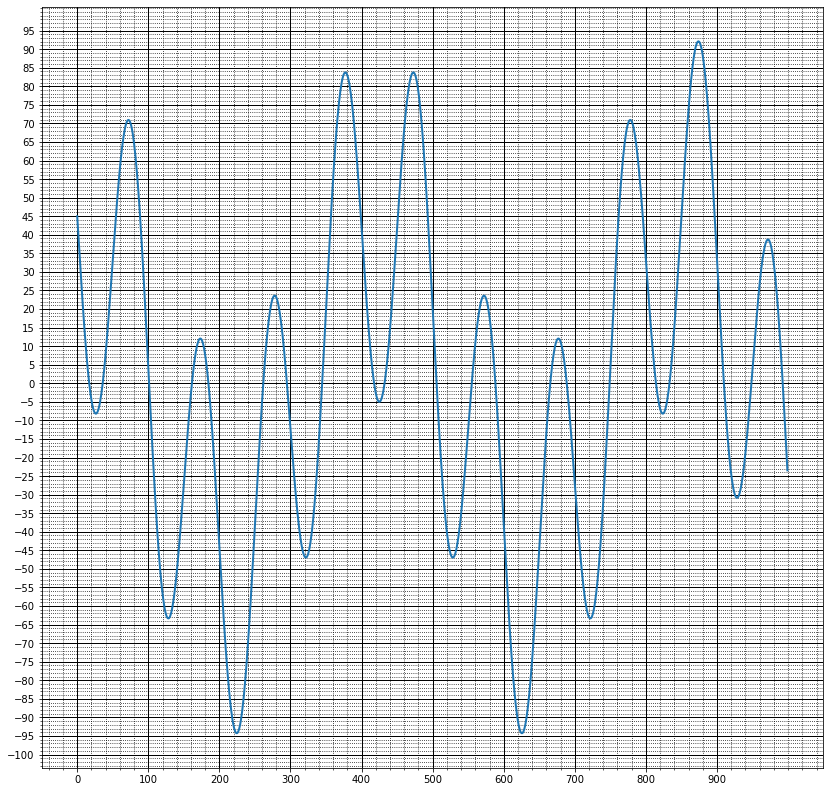

In [110]:
draw_signal(test_data['task2']['c'])

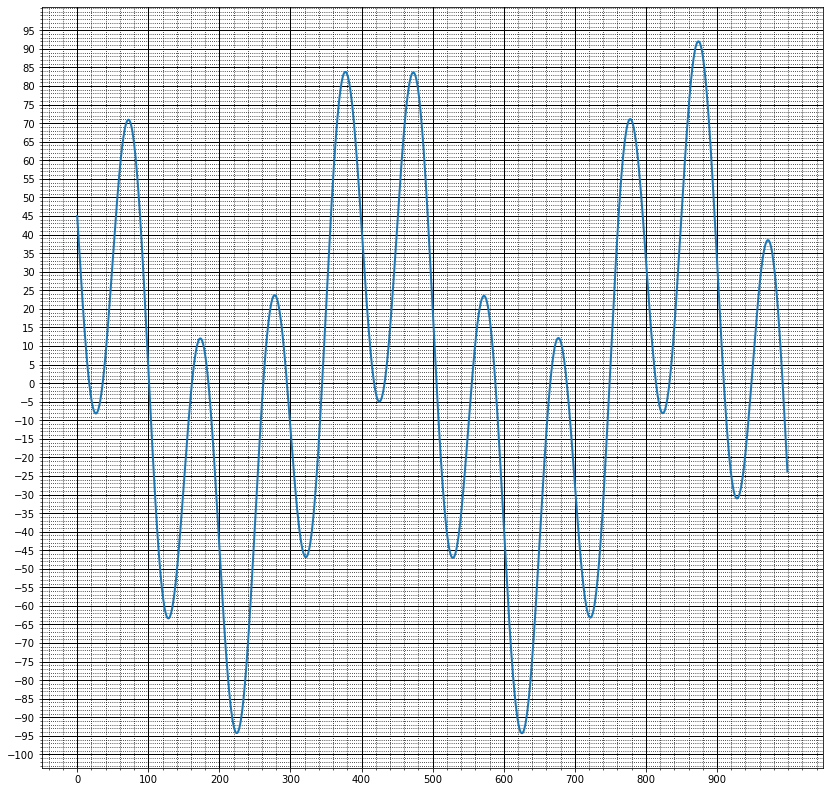

In [312]:
draw_signal(c)

In [311]:
# сигнал состоит из двух гармоник
# YOUR CODE HERE
x_set = np.arange(0, 1000, step=1)
A1 = 45
w1 = 69957
a = A1 * np.cos(w1 * x_set)
A2 = 50
w2 = 10449
b = A2 * np.sin(w2 * x_set + np.pi)
c = b + a

In [313]:
assert len(c)== 1000
assert np.allclose(c, test_data["task2"]["c"], atol=1)
print("Ok!")

Ok!


# Задание 3. Свертка (3 балла)

## Теория
Одна из наиболее частых операций, которая выполняется при обработке сигналов, это свёртка. Свёртка имеет много различных применений, например, с ее помощью можно убрать из сигнала шумы или применить к сигналу эффект эхо.


Свёртка — это математическая операция, применённая к двум функциям f и g и порождающая третью функцию. Операцию свёртки можно интерпретировать как «схожесть» одной функции с отражённой и сдвинутой копией другой.  Другими словами, преобразование свёртки однозначно определяет выходной сигнал y(t) для установленного значения входного сигнала x(t) при известном значении функции импульсного отклика системы h(t).

<!-- ![Convolution](resources/Convolution_of_box_signal_with_itself2.gif "Convolution") -->
![Convolution](resources/Convolution_of_box_signal_with_itself2.gif "Convolution")

Формула свёртки:
$$y_t=\frac{1}{2} \int_0^T x(\tau)h(t-τ)dτ$$
где $\tau$  - длительность импульсной переходной характеристики.

## Практика
Реализуйте операцию свёртки. Сравните её с существующей реализацией scipy.signal.convolve. Постройте графики фильтра, исходного сигнала и результата свертки.

In [214]:
def convolve(in1, in2):
    out = [0] * (len(in1) + len(in2) - 1)
    for i in range(len(in1)):
        for j in range(len(in2)):
            out[i + j] += in1[i] * in2[j]
    return out

In [204]:
import scipy
def test_convolve(a, b, print_debug=False):
    my_result = convolve(a, b)
    scipy_result = scipy.signal.convolve(a, b, method='direct')
    if print_debug:
        print(f"Your result {my_result}")
        print(f"Scipy result {scipy_result}")
    assert np.allclose(my_result, scipy_result), f"Test {a} conv {b} failed"
    print("Ok!")

In [205]:
a = np.repeat([0,1,0], 10)
b = np.array([0,1,2,3,2,1,0])

In [213]:
test_convolve(a, b, print_debug=False)

Ok!


### Нарисуйте результат свертки a и b

Сигнал **а**

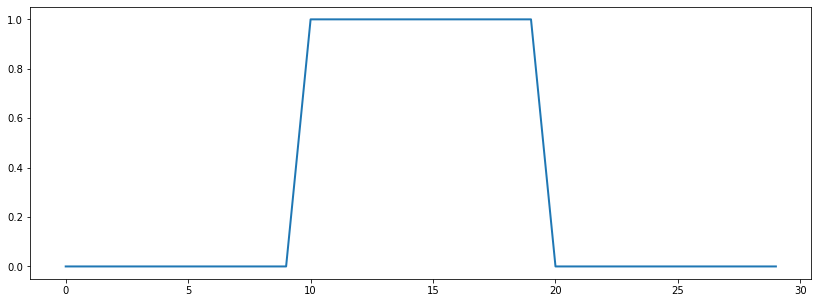

In [224]:
plt.figure(figsize=(14, 5))
plt.plot(a, linewidth=2)
plt.show()

Сигнал **b**

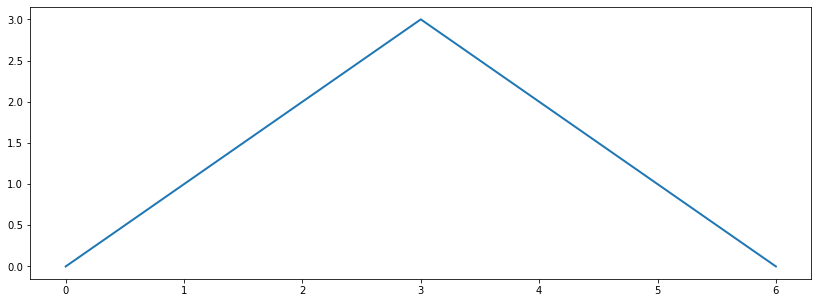

In [221]:
plt.figure(figsize=(14, 5))
plt.plot(b, linewidth=2)
plt.show()

Свертка **a** и **b**

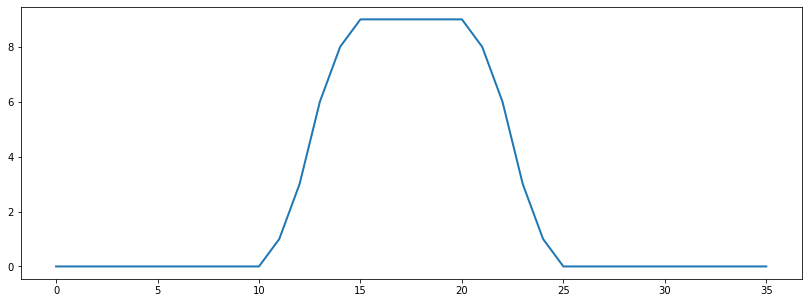

In [222]:
plt.figure(figsize=(14, 5))
plt.plot(convolve(a, b), linewidth=2)
plt.show()

Все 3 графика на одной картинке:

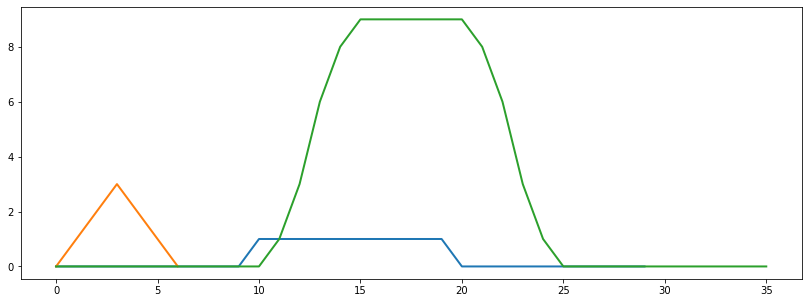

In [225]:
plt.figure(figsize=(14, 5))
plt.plot(a, linewidth=2)
plt.plot(b, linewidth=2)
plt.plot(convolve(a, b), linewidth=2)
plt.show()

# Задание 4. * Алгоритм Карплуса-Стронга 

Реализуйте  [Алгоритм Карплуса-Стронга](https://en.wikipedia.org/wiki/Karplus%E2%80%93Strong_string_synthesis). В качестве фильтра используйте усреднитель двух смежных отсчетов. Проверьте результат. 

Отрисуйте и воспроизведите полученный сигнал. На что влияют параметры генерации? Попробуйте имитировать звучание разных струн гитары.

In [314]:
def karplus_strong(noise, N):
    # Noise - input
    # N - number of samples to generate
    # return y - generated signal based on Noise 
    # YOUR CODE HERE
    out = [0] * N
    for i in range(len(noise)):
        out[i] = noise[i]
    for i in range(len(noise), N):
        out[i] = (out[i - len(noise)] + out[i - len(noise) - 1]) / 2
    return out

In [315]:
sample_rate = 44100 
frequency = 82.41
sec = 2
gen_len = sample_rate * sec
noise = (2 * np.random.uniform(-1, 1, int(sample_rate/frequency))) # [-1, 1]

In [316]:
np.random.seed(seed=1)
sample_rate = 44100 
frequency = 82.41
sec = 2
gen_len = sample_rate * sec
noise = (2 * np.random.uniform(-1, 1, int(sample_rate/frequency))) # [-1, 1]

gen_wav = karplus_strong(noise, gen_len)
assert np.allclose(gen_wav[:len(noise)], noise), "Generated signal must starting with noise"
assert np.allclose(gen_wav[len(noise)], (noise[0])/2), "Out of range samples eq 0."
assert np.allclose(gen_wav[len(noise)+1: 2*len(noise)], (noise[:-1] + noise[1:])/2), \
    "Bad requrent rule( 1 iteration)"
assert np.allclose(gen_wav[2*len(noise)], (noise[0]/2 + noise[-1])/2), \
    "Bad requrent rule( 2 iteration)"
assert np.allclose(gen_wav[2*len(noise)+2: 3*len(noise)], \
                   (((noise[:-1] + noise[1:])/2)[:-1] + ((noise[:-1] + noise[1:])/2)[1:])/2), \
    "Bad requrent rule( 3 iteration)"
print('All Ok!')

All Ok!


In [245]:
ipd.Audio(karplus_strong(noise, gen_len), rate=gen_len)

### Попробуем покрутить параметры генерации

Сгенерируем гитарные ноты:

In [292]:
# Нота До 4 октавы
sample_rate = 44100 
frequency = 261.6
sec = 1
gen_len1 = sample_rate * sec
noise1 = (2 * np.random.uniform(-1, 1, int(sample_rate/frequency))) # [-1, 1]
do = karplus_strong(noise1, gen_len1)
ipd.Audio(do, rate=gen_len1)

In [293]:
# Нота Ре 4 октавы
sample_rate = 44100 
frequency = 293.7
sec = 1
gen_len2 = sample_rate * sec
noise2 = (2 * np.random.uniform(-1, 1, int(sample_rate/frequency))) # [-1, 1]
re = karplus_strong(noise2, gen_len2)
ipd.Audio(re, rate=gen_len2)

In [294]:
# Нота Ми-бемоль 4 октавы
sample_rate = 44100 
frequency = 311.1
sec = 1
gen_len3 = sample_rate * sec
noise3 = (2 * np.random.uniform(-1, 1, int(sample_rate/frequency))) # [-1, 1]
mi = karplus_strong(noise3, gen_len3)
ipd.Audio(mi, rate=gen_len3)

Визуализируем затухание амплитуды:

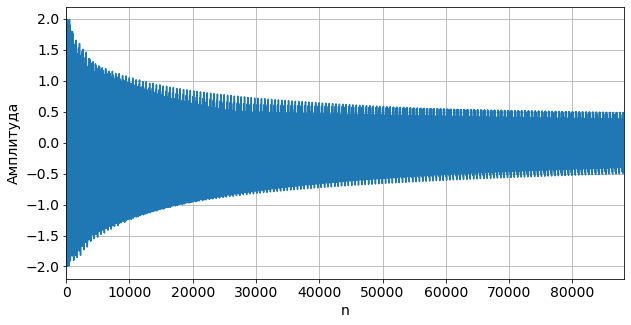

In [296]:
plt.figure(figsize=(10,5))
plt.xlabel('n', fontsize=14)
plt.ylabel('Амплитуда', fontsize=14)
plt.xlim(0, gen_len)
plt.plot(np.linspace(0, gen_len+1, gen_len), gen_wav)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.grid()

Визуализируйте затухание амплитуд гитарных нот:

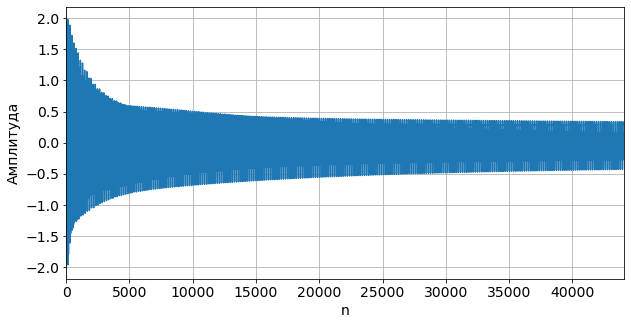

In [297]:
#Нота До
plt.figure(figsize=(10,5))
plt.xlabel('n', fontsize=14)
plt.ylabel('Амплитуда', fontsize=14)
plt.xlim(0, gen_len1)
plt.plot(np.linspace(0, gen_len1+1, gen_len1), do)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.grid()

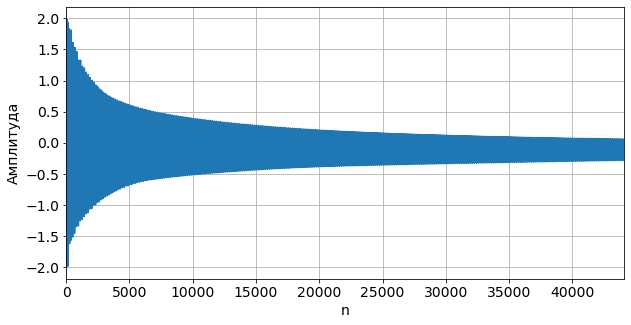

In [298]:
#Нота Ре
plt.figure(figsize=(10,5))
plt.xlabel('n', fontsize=14)
plt.ylabel('Амплитуда', fontsize=14)
plt.xlim(0, gen_len2)
plt.plot(np.linspace(0, gen_len2+1, gen_len2), re)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.grid()

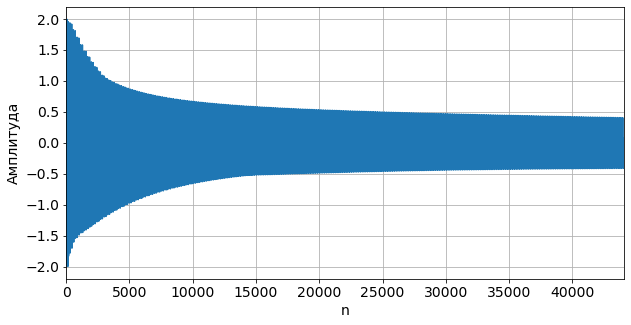

In [299]:
#Нота Ми
plt.figure(figsize=(10,5))
plt.xlabel('n', fontsize=14)
plt.ylabel('Амплитуда', fontsize=14)
plt.xlim(0, gen_len3)
plt.plot(np.linspace(0, gen_len3+1, gen_len3), mi)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.grid()